# EPSY 5200: Programming for Social Science Researchers
## Assignment 11
### Due Wednesday, November 20, 2019 by 2:30pm

#### Problem 1

a) Fork this GitHub respoitory to your own account, then clone to your hard drive with GitKraken.  After finishing EACH problem below, make sure to STAGE and COMMIT with a comment.  Then PUSH back to GitHub.

b) Load helpful libraries in this Jupyter Notebook.

c) Import the *MA_Public_Schools_2017.csv* file as a pandas data frame.  Note: these data are from Kaggle: https://www.kaggle.com/ndalziel/massachusetts-public-schools-data and I have already removed a lot of columns.

d) *NEW* Adapt the example code in the chunk below to replace all spaces in column names with underscores. This is good practice in order to not cause problems with functions that don't allow spaces in variable names (e.g., **smf.ols**).

e) *NEW* Adapt the code from 1d to replace "%" sign with "Perc", because it is also good practice not to start column names with symbols.

f) Find the descriptives for numeric columns.

In [15]:
# 1b)
import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf

In [2]:
# Problem 1 code here (can split into multiple code chunks if you want)

# 1c)
school_data = pd.read_csv('MA_Public_Schools_2017.csv')

# starter code for 1d -- replace school_data w/ your dataframe name
school_data.columns = school_data.columns.str.replace(' ', '_')

# 1e)
school_data.columns = school_data.columns.str.replace('%', 'Perc')

In [3]:
school_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
School_Code,1861.0,2.918442e+06,3.941407e+06,10002.00,9.700600e+05,2.100410e+06,3.310030e+06,3.902090e+07
District_Code,1861.0,2.918254e+06,3.941370e+06,10000.00,9.700000e+05,2.100000e+06,3.310000e+06,3.902000e+07
PK_Enrollment,1861.0,1.583772e+01,3.778451e+01,0.00,0.000000e+00,0.000000e+00,1.500000e+01,5.600000e+02
K_Enrollment,1861.0,3.553520e+01,4.463299e+01,0.00,0.000000e+00,1.700000e+01,6.400000e+01,5.570000e+02
1_Enrollment,1861.0,3.662923e+01,4.273241e+01,0.00,0.000000e+00,2.200000e+01,6.600000e+01,2.450000e+02
2_Enrollment,1861.0,3.751854e+01,4.384267e+01,0.00,0.000000e+00,2.000000e+01,6.800000e+01,2.500000e+02
3_Enrollment,1861.0,3.858463e+01,4.654178e+01,0.00,0.000000e+00,1.600000e+01,7.100000e+01,3.190000e+02
4_Enrollment,1861.0,3.871736e+01,4.891556e+01,0.00,0.000000e+00,1.600000e+01,7.000000e+01,4.460000e+02
5_Enrollment,1861.0,3.808920e+01,5.504038e+01,0.00,0.000000e+00,0.000000e+00,6.600000e+01,4.870000e+02
6_Enrollment,1861.0,3.787963e+01,7.530429e+01,0.00,0.000000e+00,0.000000e+00,4.500000e+01,4.900000e+02


#### Problem 2

a) Remove the District Code column.

b) Create a new column called "TOTAL_Enrollment" that is the sum of all columns that end in "Enrollment".

c) Compute the mean of "TOTAL_Enrollment" for each District. (Hint: groupby)

In [4]:
# Problem 2 code here (can split into multiple code chunks if you want)

# 2a)
school_data2 = school_data.drop(['District_Code'], axis = 1)

#colnames = school_data2.columns[school_data2.columns.str.contains('Enrollment')]
#print(colnames)

# 2b)
cols = school_data2.loc[:, school_data2.columns.str.contains('Enrollment')]
school_data2['TOTAL_Enrollment'] = cols.sum(axis = 1)

# 2c)
TotEnrMean = school_data2.groupby('District_Name')['TOTAL_Enrollment'].mean()
print(TotEnrMean)

District_Name
Abby Kelley Foster Charter Public (District)            1425.000000
Abington                                                 383.200000
Academy Of the Pacific Rim Charter Public (District)     527.000000
Acton-Boxborough                                         620.888889
Acushnet                                                 477.500000
                                                           ...     
Winthrop                                                 492.750000
Woburn                                                   420.727273
Worcester                                                566.200000
Worthington                                               60.000000
Wrentham                                                 515.500000
Name: TOTAL_Enrollment, Length: 410, dtype: float64


#### Problem 3

a) Visualize the bivariate relationships among Average_Class_Size, Average_Salary, Perc_Economically_Disadvantaged, and Perc_English_Language_Learner.  Use the Seaborn function **pairplot**.

b) Describe what you see from the plots.

c) Based on your observations from 3b, and as a completely post-hoc, exploratory analysis, choose one of the 4 measures from 3a to be an outcome variable, and a second measure to be a predictor variable.  Then run a linear regression, print the summary, and write a couple sentences interpreting the results.

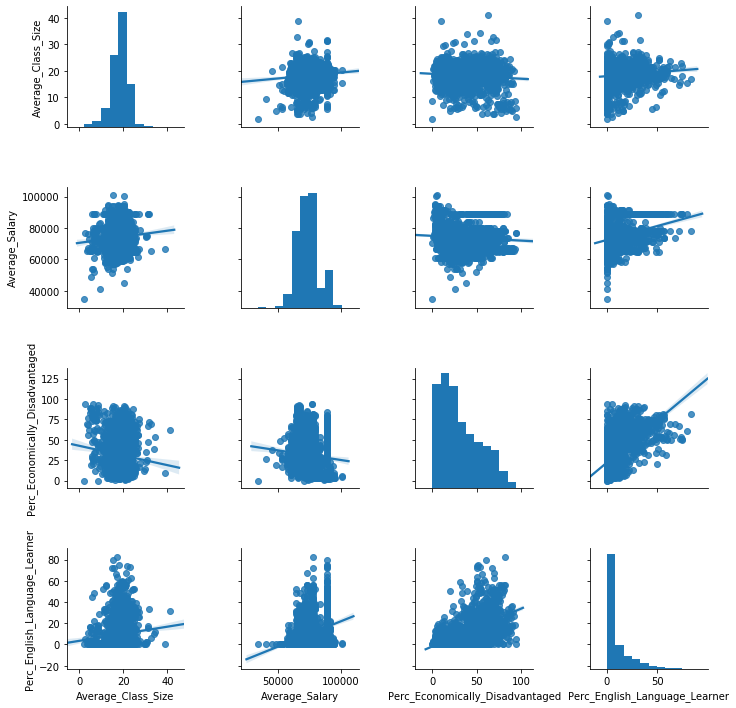

In [6]:
# Problem 3 code here (can split into multiple code chunks if you want)

# 3a)
sns.pairplot(school_data2[['Average_Class_Size', 'Average_Salary', 'Perc_Economically_Disadvantaged', 'Perc_English_Language_Learner']], kind = 'reg')


In general, there seems to be strong relationships with percent english learners. The other pairs seem to have relatively flat correlations.

In [7]:
# 3c)
ols_mod = smf.ols(formula = 'Perc_Economically_Disadvantaged ~ Perc_English_Language_Learner', data = school_data2).fit()
ols_mod.summary()

# Results: Percent english learners is a significant predictor of being economically disadvantaged.
# The R-squared tells us we can explain about 36% of the variance in our model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Perc_Economically_Disadvantaged   R-squared:                       0.367
Model:                                         OLS   Adj. R-squared:                  0.367
Method:                              Least Squares   F-statistic:                     1074.
Date:                             Sun, 17 Nov 2019   Prob (F-statistic):          4.78e-186
Time:                                     17:25:52   Log-Likelihood:                -7953.4
No. Observations:                             1850   AIC:                         1.591e+04
Df Residuals:                                 1848   BIC:                         1.592e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        21.9623      0.512     42.887      0.000      20.958      22.967
Perc_English_Language_Learner     1.0320      0.031     32.766      0.000       0.970       1.094
==============================================================================
Omnibus:                      154.282   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.562
Skew:                           0.742   Prob(JB):                     5.64e-43
Kurtosis:                       3.568   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Problem 4

a) Create a new linear regression model that takes the model from 3c and adds both of the remaining variables from 3a as additional predictor variables, print the summary, and write a couple sentences interpreting the results, especially comparing it to Problem 3c.  

b) Add School_Type as another predictor to your model.  Interpret the new predictor in your output.  How is it different from the other predictors?

In [8]:
# Problem 4 code here (can split into multiple code chunks if you want)

# 4a)
ols_modf = smf.ols(formula = 'Perc_Economically_Disadvantaged ~ Perc_English_Language_Learner + Average_Class_Size + Average_Salary', data = school_data2).fit()
ols_modf.summary()

# Results: The model here can explain more variance than our previous one AND has an overall large F-statistic.
# The other predictors are significant contributors to our model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Perc_Economically_Disadvantaged   R-squared:                       0.485
Model:                                         OLS   Adj. R-squared:                  0.484
Method:                              Least Squares   F-statistic:                     545.8
Date:                             Sun, 17 Nov 2019   Prob (F-statistic):          6.63e-250
Time:                                     17:31:20   Log-Likelihood:                -7321.7
No. Observations:                             1743   AIC:                         1.465e+04
Df Residuals:                                 1739   BIC:                         1.467e+04
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        95.4280      4.006     23.820      0.000      87.570     103.285
Perc_English_Language_Learner     1.2184      0.031     39.561      0.000       1.158       1.279
Average_Class_Size               -0.9700      0.101     -9.590      0.000      -1.168      -0.772
Average_Salary                   -0.0008   5.06e-05    -15.425      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      107.218   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.436
Skew:                           0.584   Prob(JB):                     1.06e-29
Kurtosis:                       3.686   Cond. No.                     7.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# 4b)
ols_modfa = smf.ols(formula = 'Perc_Economically_Disadvantaged ~ Perc_English_Language_Learner + Average_Class_Size + Average_Salary + School_Type', data = school_data2).fit()
ols_modfa.summary()

# Results: School_Type split our intercept in half. School_Type was part of our intercept until we 
# explicitly included it as a predictor. As such, our model fit (R-squared) isn't any better.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Perc_Economically_Disadvantaged   R-squared:                       0.485
Model:                                         OLS   Adj. R-squared:                  0.484
Method:                              Least Squares   F-statistic:                     545.8
Date:                             Sun, 17 Nov 2019   Prob (F-statistic):          6.63e-250
Time:                                     17:32:03   Log-Likelihood:                -7321.7
No. Observations:                             1743   AIC:                         1.465e+04
Df Residuals:                                 1739   BIC:                         1.467e+04
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        47.7140      2.003     23.820      0.000      43.785      51.643
School_Type[T.Public School]     47.7140      2.003     23.820      0.000      43.785      51.643
Perc_English_Language_Learner     1.2184      0.031     39.561      0.000       1.158       1.279
Average_Class_Size               -0.9700      0.101     -9.590      0.000      -1.168      -0.772
Average_Salary                   -0.0008   5.06e-05    -15.425      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      107.218   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.436
Skew:                           0.584   Prob(JB):                     1.06e-29
Kurtosis:                       3.686   Cond. No.                     5.32e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.42e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Problem 5

a) Adapt your **pairplot** code from 3a to add the following argument:
`hue="School_Type"`

b) Describe what changes in the pairplots, and what it represents.

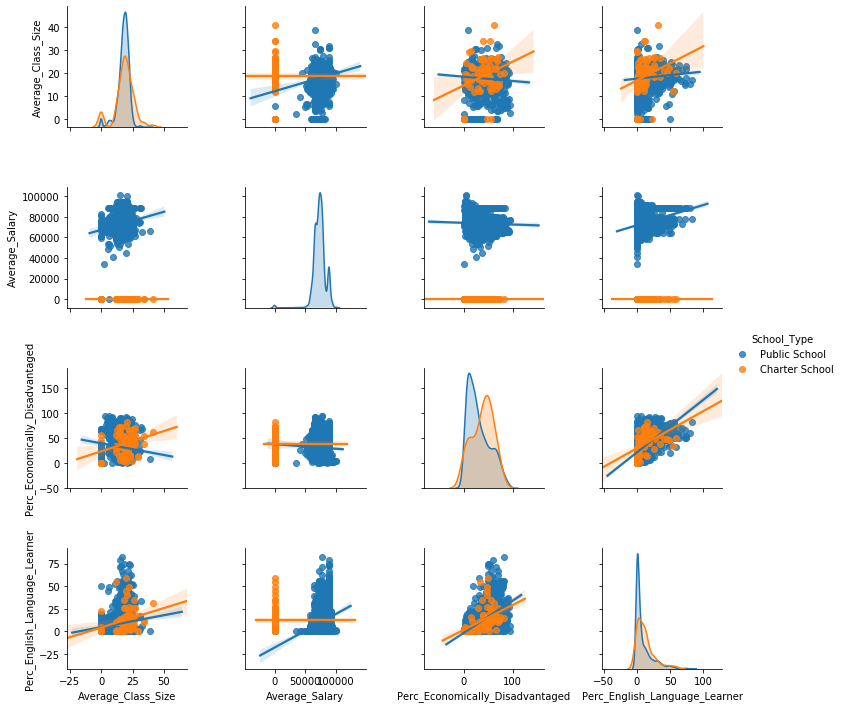

In [52]:
# Problem 5 code here (can split into multiple code chunks if you want)

# 5a)
df = school_data2[['School_Type', 'Average_Class_Size', 'Average_Salary', 'Perc_Economically_Disadvantaged', 'Perc_English_Language_Learner']].replace(np.nan, 0)

# 5b) Note: had to replace NaNs with 0s in order to plot both levels, pairplots can't handle NaNs.
sns.pairplot(df, kind = 'reg', hue = 'School_Type')

#### Problem 6

a) Save this Jupyter notebook as an HTML file (File > Download As > HTML) into your local repository (this folder).

b) Stage, commit, and push all changes to your GitHub repository.

c) Submit a link to your repository as your submission for the assignment on Canvas.